# Datasets with PyTorch
* load data from outside files
* build random batches using PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>data</tt></strong></a> utilities<br>

briefly mention <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>.

In [55]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('/content/sample_data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [57]:
df.shape
# df.columns[0], df.columns[1], df.columns[2]
# df[df['target']==1][df.columns[0]]

(150, 5)

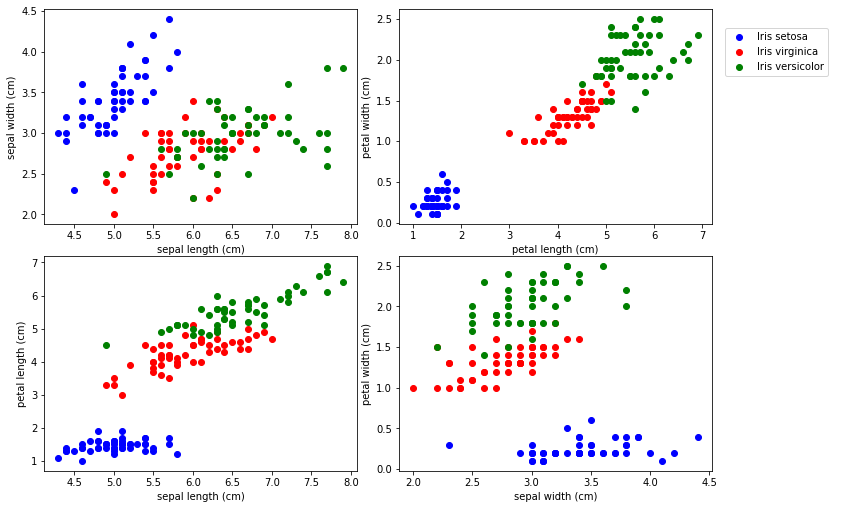

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout()
plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
  for j in range(3):
    x = df.columns[plots[i][0]]
    y = df.columns[plots[i][1]]
    ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
    ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
# plt.show()

### building train/test split tensors

*   sklearn.model_selection import train_test_split
*   PyTorch's Dataset and DataLoader classes





#### train_test_split
  sklearn.model_selection 

In [59]:
df.drop('target', axis=1).values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [60]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('target', axis=1).values,
                                                    df['target'].values, test_size=0.2,
                                                    random_state=33)
X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y).reshape(-1, 1)
y_test = torch.LongTensor(test_y).reshape(-1, 1)
X_train.shape, y_train.shape

(torch.Size([120, 4]), torch.Size([120, 1]))

In [61]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(labels, counts)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
tensor([0, 1, 2]) tensor([42, 42, 36])
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


In [62]:
X_train.size() == X_train.shape

True

#### PyTorch's Dataset and DataLoader classes


In [63]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target', axis=1).values
labels = df['target'].values

iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))
len(iris), type(iris)

(150, torch.utils.data.dataset.TensorDataset)

In [64]:
# for i in iris:
#   print(i)

In [65]:
iris_loader = DataLoader(iris, batch_size=50, shuffle=True)

for i_batch, sample_batched in enumerate(iris_loader):
  print(i_batch, sample_batched)

0 [tensor([[6.3000, 2.3000, 4.4000, 1.3000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [5.9000, 3.0000, 5.1000, 1.8000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.9000, 3.8000, 6.4000

In [66]:
sample = next(iter(iris_loader))
# sample

In [67]:
list(iris_loader)[0][1].bincount()

tensor([15, 15, 20])

# Classification

In [68]:
# create a model
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [69]:
torch.manual_seed(32)
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [70]:
df = pd.read_csv('/content/sample_data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [71]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [89]:
X = df.drop('target', axis=1)
y = df['target'].values
type(X), type(y)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [91]:
type(X.values), type(y)

(numpy.ndarray, numpy.ndarray)

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=33)
y_train

array([1., 1., 2., 2., 2., 2., 2., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       2., 0., 0., 1., 2., 0., 1., 2., 2., 1., 1., 0., 0., 2., 0., 0., 2.,
       1., 1., 2., 2., 2., 2., 0., 0., 1., 1., 0., 1., 2., 1., 2., 0., 2.,
       0., 1., 0., 2., 1., 0., 2., 2., 0., 0., 2., 0., 0., 0., 2., 2., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 2., 0., 0., 0.,
       0., 2., 2., 0., 1., 1., 2., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       2., 2., 2., 1., 2., 0., 1., 0., 0., 0., 2., 1., 2., 1., 2., 1., 2.,
       0.])

In [97]:
# convert from np arr to tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

type(X_train)

torch.Tensor

In [98]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [84]:
torch.optim??

In [99]:
# start to train
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss)

  if i%10==0:
    print(f'epoch: {i} loss_item_f: {loss.item():10.8f} loss_item: {loss.item()} loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epoch: 0 loss_item_f: 1.15071142 loss_item: 1.1507114171981812 loss: 1.1507114171981812
epoch: 10 loss_item_f: 0.93773150 loss_item: 0.9377315044403076 loss: 0.9377315044403076
epoch: 20 loss_item_f: 0.77982563 loss_item: 0.7798256278038025 loss: 0.7798256278038025
epoch: 30 loss_item_f: 0.60994017 loss_item: 0.6099401712417603 loss: 0.6099401712417603
epoch: 40 loss_item_f: 0.40079936 loss_item: 0.40079936385154724 loss: 0.40079936385154724
epoch: 50 loss_item_f: 0.25436321 loss_item: 0.25436320900917053 loss: 0.25436320900917053
epoch: 60 loss_item_f: 0.15053055 loss_item: 0.15053054690361023 loss: 0.15053054690361023
epoch: 70 loss_item_f: 0.10086947 loss_item: 0.10086946934461594 loss: 0.10086946934461594
epoch: 80 loss_item_f: 0.08128312 loss_item: 0.08128312230110168 loss: 0.08128312230110168
epoch: 90 loss_item_f: 0.07231426 loss_item: 0.07231426239013672 loss: 0.07231426239013672


Text(0, 0.5, 'loss')

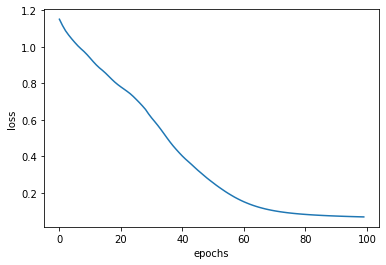

In [102]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [106]:
# y_val = torch.tensor([1, 2,3])
# y_val.argmax().item()

2

## validate the model

In [113]:
# turn off gradient engine
with torch.no_grad():
  y_val = model.forward(X_test)
  loss = criterion(y_val, y_test)
print(loss.item())
print(f'{loss:.8f}')

0.058098990470170975
0.05809899


In [120]:
correct = 0;
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1:2}). {str(y_val):38} {y_val.argmax().item()} {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1). tensor([-2.1252,  4.8064, -0.8628])    1 1
 2). tensor([-1.7985,  5.3098, -1.5449])    1 1
 3). tensor([  6.3542,   0.8438, -10.0541]) 0 0
 4). tensor([-3.9123,  4.5958,  1.1693])    1 1
 5). tensor([-7.4713,  3.2021,  5.7853])    2 2
 6). tensor([-10.4976,   1.6459,   9.6297]) 2 2
 7). tensor([  6.3201,   0.9917, -10.1532]) 0 0
 8). tensor([  7.0468,   0.7059, -10.9137]) 0 0
 9). tensor([-7.2061,  3.3477,  5.3565])    2 2
10). tensor([-9.3960,  2.5759,  8.1033])    2 2
11). tensor([-9.8807,  2.3475,  8.7141])    2 2
12). tensor([ 6.2748,  0.6655, -9.7613])    0 0
13). tensor([-9.3142,  2.1880,  8.1947])    2 2
14). tensor([-3.7803,  4.5050,  1.0752])    1 1
15). tensor([-7.8657,  3.0117,  6.2303])    2 2
16). tensor([-1.8867,  5.1572, -1.3345])    1 1
17). tensor([-5.7006,  3.5030,  3.6696])    2 2
18). tensor([  7.1789,   0.7369, -11.1350]) 0 0
19). tensor([-3.2944,  4.7931,  0.3475])    1 1
20). tensor([-7.7665,  3.7629,  5.7095])    2 2
21). tensor([  6.6499,   0.7889, -10.425

# Save the trained model to a file
Right now <strong><tt>model</tt></strong> has been trained and validated, and seems to correctly classify an iris 97% of the time. Let's save this to disk.<br>
The tools we'll use are <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><strong><tt>torch.save()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.load'><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class. The syntax follows:<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
<strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

In [121]:
model.state_dict()

OrderedDict([('fc1.weight', tensor([[ 0.1212, -0.4386, -0.4620, -0.0438],
                      [-0.3870,  0.0793,  0.1481, -0.4771],
                      [ 0.3720,  0.0896,  0.5770, -0.0469],
                      [ 0.7633,  0.6491, -0.4408, -1.3607],
                      [ 0.3509, -0.6458,  0.8176,  0.9495],
                      [ 0.4722,  0.9446, -0.7488, -1.1533],
                      [ 0.1646, -0.1114, -0.4213, -0.3553],
                      [-0.3191,  0.1440, -0.3496,  0.2280]])),
             ('fc1.bias',
              tensor([ 0.1859, -0.2029,  0.6706,  0.7742, -0.1637,  0.7040, -0.3122,  0.3781])),
             ('fc2.weight',
              tensor([[-0.2174,  0.0821,  0.1038, -0.3532, -0.4185,  0.1002, -0.3494, -0.2639],
                      [ 0.1729, -0.1185,  0.8347, -0.0941,  0.5682, -0.6716,  0.0699, -0.3265],
                      [-0.3545, -0.2716,  0.1348, -0.5668,  0.6431, -0.7774,  0.3048, -0.2101],
                      [-0.0737, -0.0607,  0.1771, -0.0418, -0.13

In [122]:
torch.save(model.state_dict(), "IrisDateSetModel.pt")

In [123]:
new_model = Model()
new_model.load_state_dict(torch.load("IrisDateSetModel.pt"))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [124]:
with torch.no_grad():
  y_val = new_model.forward(X_test)
  loss = criterion(y_val, y_test)
print(f'loss: {loss:.8f}')

loss: 0.05809899


# Apply the model to classify new, unseen data

In [125]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])


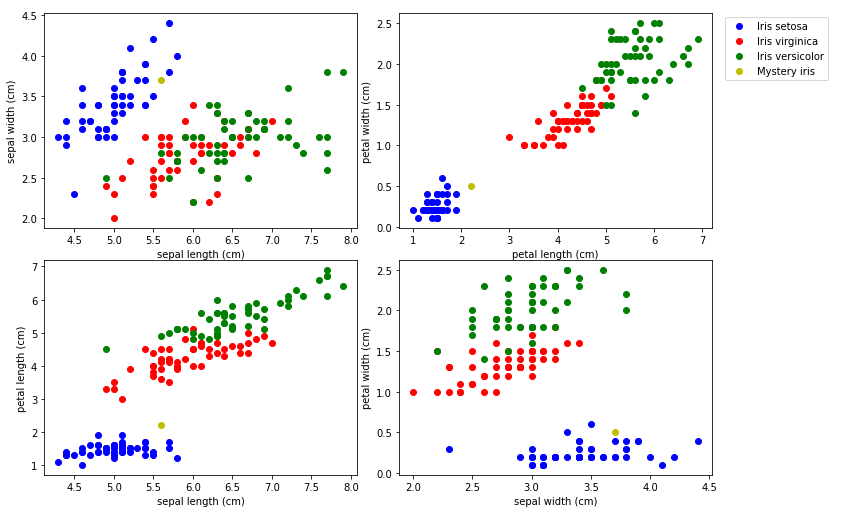

In [128]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [129]:
labels

['Iris setosa', 'Iris virginica', 'Iris versicolor', 'Mystery iris']

In [130]:
with torch.no_grad():
  y_val = new_model.forward(mystery_iris)
  print(f'{str(y_val)}')
  print(labels[y_val.argmax().item()])

tensor([  5.9522,   1.5596, -10.0054])
Iris setosa
